# Этап I. Построение модели дерева CHAID на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки

## I.1. Загрузка данных

In [1]:
# задаем рабочую директорию
setwd("/Users/artemgruzdev/Course_ML/Data")

In [2]:
# отключаем предупреждения
options(warn = -1)

# считываем CSV-файл в датафрейм data
data <- read.csv2("Churn_Verizon.csv", sep = ";", fileEncoding = "cp1251")

## I.2. Фиксация пустых строковых значений как пропусков

In [3]:
# смотрим первые 10 наблюдений датафрейма data
head(data, 10)

longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,1
,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,1
<2,<8,Нет,,CC,Мужской,Женат,NA,,1
<2,<8,,Бесплатный,CH,Мужской,Одинокий,NA,<31,0
<2,,Нет,Бесплатный,Auto,,Одинокий,16829.6,<31,1
,<8,Нет,Бесплатный,,Женский,Одинокий,57272.7,<31,1
,<8,Нет,Бюджетный,,Мужской,Женат,NA,<31,1
<2,<8,Нет,Бесплатный,Auto,Мужской,,NA,<31,1
<2,<8,Да,,CH,Мужской,Одинокий,92167.3,<31,1
<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.5,<31,1


In [4]:
# выводим количество пропусков по переменной income 
sum(is.na(data$income))

[1] 4

In [5]:
# выводим количество пропусков по переменной pay 
sum(is.na(data$pay))

[1] 0

In [6]:
# помечаем пустые строковые значения как пропуски 
is.na(data) <- data == ''

In [7]:
# выводим первые 10 наблюдений датафрейма data 
head(data, 10)

longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,1
NA,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,1
<2,<8,Нет,NA,CC,Мужской,Женат,NA,NA,1
<2,<8,NA,Бесплатный,CH,Мужской,Одинокий,NA,<31,0
<2,NA,Нет,Бесплатный,Auto,NA,Одинокий,16829.6,<31,1
NA,<8,Нет,Бесплатный,NA,Женский,Одинокий,57272.7,<31,1
NA,<8,Нет,Бюджетный,NA,Мужской,Женат,NA,<31,1
<2,<8,Нет,Бесплатный,Auto,Мужской,NA,NA,<31,1
<2,<8,Да,NA,CH,Мужской,Одинокий,92167.3,<31,1
<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.5,<31,1


In [8]:
# выводим количество пропусков по переменной pay 
sum(is.na(data$pay))

[1] 2

In [9]:
# фиксируем пустые строковые
# значения как пропуски 
data <- read.csv2("Churn_Verizon.csv", sep = ";", fileEncoding = "cp1251", na.strings = "")

## I.3. Изменение типов переменных

In [10]:
# смотрим типы переменных
str(data)

'data.frame':	4431 obs. of  10 variables:
 $ longdist: Factor w/ 5 levels "<2","15-20","2-8",..: 1 NA 1 1 1 NA NA 1 1 1 ...
 $ local   : Factor w/ 5 levels "<8","21-35","36-55",..: 1 1 1 1 NA 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 NA 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 NA 1 1 1 2 1 NA 1 ...
 $ pay     : Factor w/ 4 levels "Auto","CC","CD",..: 2 2 2 4 1 NA NA 1 4 2 ...
 $ gender  : Factor w/ 4 levels "Женский","Женский&*",..: 3 3 3 3 NA 1 3 3 3 3 ...
 $ marital : Factor w/ 5 levels "_Женат","_Одинокий",..: 4 4 4 5 5 5 4 NA 5 4 ...
 $ income  : num  77680 37112 NA NA 16830 ...
 $ agecat  : Factor w/ 5 levels "<31","31-45",..: 1 1 NA 1 1 1 1 1 1 1 ...
 $ churn   : int  1 1 1 0 1 1 1 1 1 1 ...


In [11]:
# преобразовываем переменную
# churn в вектор типа factor 
data$churn <- as.factor(data$churn)

In [12]:
# преобразовываем переменные longdist, local,
# agecat в вектор типа ordered factor 
data$longdist <- ordered(data$longdist, 
                         levels = c("<2", "2-8", "9-14", "15-20", "21+"))
data$local <- ordered(data$local, 
                      levels = c("<8", "8-20", "21-35", "36-55", "56+"))
data$agecat <- ordered(data$agecat, 
                       levels = c("<31", "31-45", "46-58", "59-70", "71+"))

In [13]:
# загружаем пакет dplyr 
library(dplyr)
# c помощью функции recode() пакета dplyr
# переименовываем категории переменной marital_status
data$churn <- dplyr::recode(data$churn, "0" = "Остается", "1" = "Уходит")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [14]:
# смотрим типы переменных 
str(data)

'data.frame':	4431 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 NA 1 1 1 NA NA 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 NA 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 NA 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 NA 1 1 1 2 1 NA 1 ...
 $ pay     : Factor w/ 4 levels "Auto","CC","CD",..: 2 2 2 4 1 NA NA 1 4 2 ...
 $ gender  : Factor w/ 4 levels "Женский","Женский&*",..: 3 3 3 3 NA 1 3 3 3 3 ...
 $ marital : Factor w/ 5 levels "_Женат","_Одинокий",..: 4 4 4 5 5 5 4 NA 5 4 ...
 $ income  : num  77680 37112 NA NA 16830 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 NA 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 2 1 2 2 2 2 2 2 ...


## I.4. Обработка дублирующихся наблюдений

In [15]:
# смотрим дублирующиеся наблюдения 
data[duplicated(data),]

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
358,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит
461,<2,<8,Да,Бесплатный,CC,Женский&*,_Одинокий,18831.1,46-58,Уходит
2060,21+,21-35,Нет,Бюджетный,CC,Мужской&*,_Женат,84269.0,31-45,Остается
3161,9-14,56+,Нет,Бюджетный,CC,Мужской&*,_Одинокий,54643.3,31-45,Остается
3834,2-8,21-35,Нет,Бесплатный,Auto,Женский,Же&нат,92353.3,46-58,Остается
4382,15-20,21-35,Нет,Бесплатный,CC,Женский&*,_Женат,87404.6,46-58,Уходит
4431,21+,8-20,Нет,Бесплатный,CC,Женский&*,_Одинокий,75639.8,31-45,Остается


In [16]:
# проверим, дублируется ли наблюдение 
# по заданному набору условий  
data[data$longdist == "<2" & 
       data$local == "<8" & 
       data$int_disc == "Нет" & 
       data$billtype == "Бюджетный" & 
       data$pay == "CC" & 
       data$gender == "Женский&*" & 
       data$marital == "_Женат" & 
       data$income == 32118.4 & 
       data$agecat == "71+" & 
       data$churn =="Уходит", ] 

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
348,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит
358,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит


In [17]:
# оставим только уникальные наблюдения  
data <- unique(data)
# смотрим, сколько наблюдений мы
# теперь будем использовать  
nrow(data)

[1] 4424

## I.5. Вывод подробной информации о переменных

In [18]:
# загружаем пакет Hmisc  
library(Hmisc)
# с помощью функции describe() пакета
# Hmisc выведем подробную информацию
# о переменных
describe(data)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



data 

 10  Variables      4424  Observations
--------------------------------------------------------------------------------
longdist 
       n  missing distinct 
    4421        3        5 
                                        
Value         <2   2-8  9-14 15-20   21+
Frequency    736   867   993  1054   771
Proportion 0.166 0.196 0.225 0.238 0.174
--------------------------------------------------------------------------------
local 
       n  missing distinct 
    4423        1        5 
                                        
Value         <8  8-20 21-35 36-55   56+
Frequency    738   763  1444   738   740
Proportion 0.167 0.173 0.326 0.167 0.167
--------------------------------------------------------------------------------
int_disc 
       n  missing distinct 
    4423        1        2 
                      
Value         Да   Нет
Frequency   1376  3047
Proportion 0.311 0.689
--------------------------------------------------------------------------------
billtype 
     

In [19]:
# отсоединяем пакет Hmisc
detach("package:Hmisc", unload = TRUE)

## I.6. Нормализация строковых значений

In [20]:
# создаем вектор названий переменных  
names <- c("gender", "marital")
# с помощью функции lapply() применяем
# функцию summary к переменным, названия
# которых записаны в векторе names  
lapply(data[,names], function(x) summary(x))

$gender
  Женский Женский&*   Мужской Мужской&*      NA's 
     2235         4      2182         2         1 

$marital
   _Женат _Одинокий    Же&нат     Женат  Одинокий      NA's 
        3         3         1      2620      1796         1

In [21]:
# с помощью функции lapply() применяем
# функцию levels к переменным, названия
# которых записаны в векторе names  
lapply(data[,names], function(x) levels(x))

$gender
[1] "Женский"   "Женский&*" "Мужской"   "Мужской&*"

$marital
[1] "_Женат"    "_Одинокий" "Же&нат"    "Женат"     "Одинокий"

In [22]:
# преобразовываем переменную gender из вектора типа factor
# в вектор типа character (нельзя напрямую изменить строковое
# значение фактора, потому что в факторе под капотом для строковых 
# значений используются целочисленные коды, поэтому переводим в 
# вектор типа character, у которого значения – строки)
data$gender <- as.character(data$gender)

# удаляем с помощью функции gsub() символы & и *,
# первый аргумент – удаляемые символы, второй
# аргумент – символы, на которые нужно заменить,
# третий аргумент – вектор типа character или строка 
data$gender <- gsub('\\&\\*', "", data$gender)

In [23]:
# преобразовываем переменную gender обратно из вектора
# типа character в вектор типа factor
data$gender <- as.factor(data$gender)

In [24]:
# загружаем пакет stringr
library(stringr)

# преобразовываем переменную marital из вектора типа factor
# в вектор типа character
data$marital <- as.character(data$marital)

# удаляем с помощью функции str_replace_all() пакета stringr
# все символы, не являющиеся буквами алфавита и числами
# первый аргумент – вектор типа character или строка,
# второй аргумент – символы, которые нужно удалить,
# третий аргумент – символы, на которые нужно заменить
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")

# преобразовываем переменную marital обратно из вектора
# типа character в вектор типа factor
data$marital <- as.factor(data$marital) 

In [25]:
# снова выводим информацию об уровнях переменной
lapply(data[,names], function(x) levels(x))

$gender
[1] "Женский" "Мужской"

$marital
[1] "Женат"    "Одинокий"

## I.7. Обработка редких категорий

In [26]:
# выводим информацию о распределении
# значений переменной pay
summary(data$pay)

Auto   CC   CD   CH NA's 
 889 2554    2  977    2

In [27]:
# загружаем пакет car
library(car)
# с помощью функции recode пакета car
# объединяем редкую категорию CD с
# самой часто встречающейся
# категорией CC
data$pay <- car::recode(data$pay, "'CD' = 'CC'")
# снова выводим информацию о распределении
# значений переменной pay
summary(data$pay)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



Auto   CC   CH NA's 
 889 2556  977    2

## I.8. Однократное случайное разбиение набора данных на обучающую и контрольную выборки для проверки модели

In [28]:
# задаем стартовое значение генератора случайных
# чисел для воспроизводимости результатов разбиения
set.seed(42)

# создаем переменную random_number, которая случайным
# образом разбивает набор данных на обучающую
# и контрольную выборки
random_number <- runif(nrow(data), 0, 1)
development <- data[random_number > 0.3, ]
holdout <- data[random_number <= 0.3, ]

In [29]:
# смотрим обучающий датафрейм 
str(development)

'data.frame':	3080 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 NA 1 1 NA NA 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 NA 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 NA 2 2 2 1 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 2 NA 1 1 2 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 3 1 NA NA 3 2 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 NA 1 2 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 2 2 2 1 2 1 2 1 ...
 $ income  : num  77680 37112 NA 16830 57273 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 2 1 2 ...


In [30]:
# смотрим контрольный датафрейм 
str(holdout)

'data.frame':	1344 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 2 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": NA 1 1 1 1 1 1 1 2 1 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 1 2 1 3 1 2 1 2 1 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 1 1 2 1 2 2 2 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 NA 2 2 1 2 2 2 1 2 ...
 $ income  : num  NA NA 24458 50969 25949 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: NA 1 1 1 1 1 2 3 3 3 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 1 2 1 ...


In [31]:
# выводим информацию о распределении
# классов зависимой переменной churn
# в обучающей выборке
summary(development$churn)

Остается   Уходит 
    1746     1334

In [32]:
# выводим информацию о распределении
# классов зависимой переменной churn
# в контрольной выборке
summary(holdout$churn)

Остается   Уходит 
     746      598

## I.9. Импутация пропусков

In [33]:
# выведем информацию о пропусках
# в обучающей выборке
sapply(development, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       3        1        1        1        2        1        0        2 
  agecat    churn 
       0        0

In [34]:
# выведем информацию о пропусках
# в контрольной выборке
sapply(holdout, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        1        0        0        1        2 
  agecat    churn 
       1        0

In [35]:
# выведем информацию о пропусках в обучающей выборке
# c помощью lapply(), теперь результат будет
# возвращен в виде списка
print(lapply(development, function(x) sum(is.na(x))))

$longdist
[1] 3

$local
[1] 1

$int_disc
[1] 1

$billtype
[1] 1

$pay
[1] 2

$gender
[1] 1

$marital
[1] 0

$income
[1] 2

$agecat
[1] 0

$churn
[1] 0



In [36]:
# выведем информацию о пропусках в контрольной выборке
# c помощью lapply(), теперь результат будет
# возвращен в виде списка
print(lapply(holdout, function(x) sum(is.na(x))))

$longdist
[1] 0

$local
[1] 0

$int_disc
[1] 0

$billtype
[1] 1

$pay
[1] 0

$gender
[1] 0

$marital
[1] 1

$income
[1] 2

$agecat
[1] 1

$churn
[1] 0



In [37]:
# вычисляем среднее значение
# переменной income
mean(development$income, na.rm = TRUE)

[1] 50184.27

In [38]:
# выполняем импутацию пропусков с помощью среднего, обратите
# внимание, среднее было вычислено отдельно для
# каждой выборке
development$income[is.na(development$income)] <- mean(development$income, 
                                                      na.rm = TRUE)
holdout$income[is.na(holdout$income)] <- mean(development$income, 
                                              na.rm = TRUE)

In [39]:
# загружаем пакет imputeMissings
library(imputeMissings)


Attaching package: ‘imputeMissings’

The following object is masked from ‘package:dplyr’:

    compute



In [40]:
# с помощью функции lapply() преобразовываем переменные 
# longdist, local и agecat в неупорядоченные факторы
names <- c("longdist", "local", "agecat")
development[,names] <- lapply(development[,names], factor, ordered = FALSE)
holdout[,names] <- lapply(holdout[,names], factor, ordered = FALSE)

In [41]:
# выполняем автоматическую импутацию с помощью
# функции impute() пакета imputeMissings
values <- imputeMissings::compute(development)
development <- imputeMissings::impute(development, object = values)
holdout <- imputeMissings::impute(holdout, object = values)

In [42]:
# с помощью функции ordered() преобразовываем переменные 
# longdist, local и agecat обратно в упорядоченные
# факторы
development$longdist <- ordered(development$longdist, 
                                levels = c("<2", "2-8", "9-14", "15-20", "21+"))
development$local <- ordered(development$local, 
                             levels = c("<8", "8-20", "21-35", "36-55", "56+"))
development$agecat <- ordered(development$agecat, 
                              levels = c("<31", "31-45", "46-58", "59-70", "71+"))
holdout$longdist <- ordered(holdout$longdist, 
                            levels = c("<2", "2-8", "9-14", "15-20", "21+"))
holdout$local <- ordered(holdout$local, 
                         levels = c("<8", "8-20", "21-35", "36-55", "56+"))
holdout$agecat <- ordered(holdout$agecat, 
                          levels = c("<31", "31-45", "46-58", "59-70", "71+"))

In [43]:
# выводим информацию о пропусках в обучающей выборке
sapply(development, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0

In [44]:
# выводим информацию о пропусках в контрольной выборке
sapply(holdout, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0

## I.10. Биннинг количественных переменных для получения порядковых предикторов

In [45]:
# выводим диапазон значений 
# переменной income
range(development$income)

[1]   110.28 99832.90

In [46]:
# разбиваем переменную income на 10 интервалов одинаковой ширины
binned <-cut(x = development$income, breaks = seq(0, 100000, by = 10000), 
             include.lowest = TRUE, right = TRUE, 
             ordered_result = TRUE, dig.lab = 6)

In [47]:
# смотрим распределение значений переменной binned
summary(binned)

[0,10000]  (10000,20000]  (20000,30000]  (30000,40000]  (40000,50000] 
           278            321            307            307            283 
 (50000,60000]  (60000,70000]  (70000,80000]  (80000,90000] (90000,100000] 
           382            319            268            308            307

In [48]:
# загружаем пакет lsr
library(lsr)
# с помощью функции quantileCut() пакета lsr разбиваем
# переменную income на 10 интервалов c одинаковым
# количеством наблюдений
binned2 <- quantileCut(x = development$income, n = 10, 
                       include.lowest = TRUE, right = TRUE, 
                       ordered_result = TRUE, dig.lab = 6)

In [49]:
# смотрим распределение значений
# переменной binned2
summary(binned2)

[10.5574,11254.7] (11254.7,20806.8] (20806.8,30901.3]   (30901.3,40756] 
              308               308               310               306 
  (40756,50290.7] (50290.7,58990.9]   (58990.9,68767]   (68767,79962.5] 
              341               275               309               307 
(79962.5,89931.5] (89931.5,99932.6] 
              308               308

In [50]:
# выполняем биннинг с учетом полученных правил разбиения
development$income <-cut(x = development$income, 
                         breaks = c(-Inf, 11000, 21000, 31000, 41000,
                                    50000, 59000, 69000, 80000,
                                    90000, +Inf), 
                         include.lowest = TRUE, 
                         ordered_result = TRUE)

holdout$income <-cut(x = holdout$income, 
                     breaks = c(-Inf, 11000, 21000, 31000, 41000,
                                50000, 59000, 69000 ,80000,
                                90000, +Inf), 
                     include.lowest = TRUE, 
                     ordered_result = TRUE)

## I.11. Построение модели и работа с диаграммой дерева

In [51]:
# загружаем пакет CHAID
library(CHAID)

Loading required package: partykit
Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm


In [52]:
# задаем набор условий для построения дерева CHAID
params <- chaid_control(minprob = 0.01, minsplit = 1000, minbucket = 500)
# строим модель дерева CHAID
chd  <- chaid(churn ~ ., control = params, development)

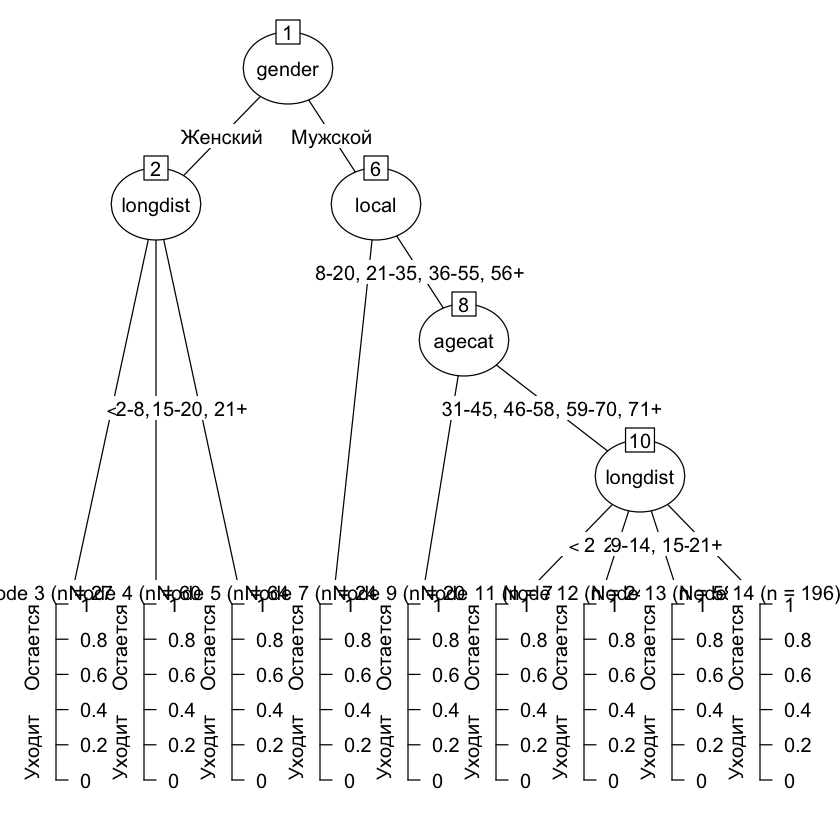

In [53]:
# выводим диаграмму дерева
plot(chd)

In [54]:
# выводим диаграмму дерева
# в схематичном виде
print(chd)


Model formula:
churn ~ longdist + local + int_disc + billtype + pay + gender + 
    marital + income + agecat

Fitted party:
[1] root
|   [2] gender in Женский
|   |   [3] longdist <2: Уходит (n = 279, err = 7.9%)
|   |   [4] longdist in 2-8, 9-14: Уходит (n = 608, err = 34.4%)
|   |   [5] longdist in 15-20, 21+: Уходит (n = 644, err = 42.7%)
|   [6] gender in Мужской
|   |   [7] local <8: Уходит (n = 248, err = 44.4%)
|   |   [8] local in 8-20, 21-35, 36-55, 56+
|   |   |   [9] agecat <31: Остается (n = 205, err = 31.2%)
|   |   |   [10] agecat in 31-45, 46-58, 59-70, 71+
|   |   |   |   [11] longdist <2: Остается (n = 70, err = 4.3%)
|   |   |   |   [12] longdist in 2-8: Остается (n = 248, err = 13.3%)
|   |   |   |   [13] longdist in 9-14, 15-20: Остается (n = 582, err = 7.4%)
|   |   |   |   [14] longdist in 21+: Остается (n = 196, err = 14.3%)

Number of inner nodes:    5
Number of terminal nodes: 9


## I.12. Получение прогнозов модели

In [55]:
# выводим спрогнозированные вероятности отрицательного
# класса для первых 10 наблюдений
# контрольной выборки
prob_hold <- predict(chd, holdout, type = "prob")
prob_hold[1:10]

[1] 0.44354839 0.44354839 0.44354839 0.07885305 0.07885305 0.44354839
 [7] 0.07885305 0.44354839 0.44354839 0.44354839

In [56]:
# округляем спрогнозированные вероятности
# до второго десятичного знака
round(prob_hold[1:10], 2)

[1] 0.44 0.44 0.44 0.08 0.08 0.44 0.08 0.44 0.44 0.44

In [57]:
# извлекаем правила разбиения,
# полученные нашей моделью
library(partykit)
treetable <- function(party_tree) {
  
  df_list <- list()
  var_names <-  attr(party_tree$terms, "term.labels")
  var_levels <- lapply(party_tree$data, levels)
  
  walk_the_tree <- function(node, rule_branch = NULL) {
    # проходим структуру разбиений дерева (рекурсивная функция)
    # извлекаем правила для каждой ветви
    if(missing(rule_branch)) {
      rule_branch <- setNames(data.frame(t(replicate(length(var_names), NA))), var_names)
      rule_branch <- cbind(rule_branch, nodeId = NA)
      rule_branch <- cbind(rule_branch, predict = NA)
    }
    if(is.terminal(node)) {
      rule_branch[["nodeId"]] <- node$id
      rule_branch[["predict"]] <- predict_party(party_tree, node$id, type = "prob") 
      
      
      df_list[[as.character(node$id)]] <<- rule_branch
    } else {
      for(i in 1:length(node)) {
        rule_branch1 <- rule_branch
        val1 <- decision_rule(node,i)
        rule_branch1[[names(val1)[1]]] <- val1
        walk_the_tree(node[i], rule_branch1)
      }
    }
  }
  
  decision_rule <- function(node, i) {
    # возвращаем правила разбиения в датафрейм вместе с названиями переменных и значениями
    var_name <- var_names[node$split$varid[[1]]]
    values_vec <- var_levels[[var_name]][ node$split$index == i]
    values_txt <- paste(values_vec, collapse = ", ")
    return( setNames(values_txt, var_name))
  }
  walk_the_tree(party_tree$node)
  res_table <- Reduce(rbind, df_list)
  return(res_table)
}

table <- treetable(chd)

In [58]:
print(table)

     longdist                   local int_disc billtype pay  gender marital
1          <2                    <NA>       NA       NA  NA Женский      NA
2   2-8, 9-14                    <NA>       NA       NA  NA Женский      NA
3  15-20, 21+                    <NA>       NA       NA  NA Женский      NA
4        <NA>                      <8       NA       NA  NA Мужской      NA
5        <NA> 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
6          <2 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
7         2-8 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
8 9-14, 15-20 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
9         21+ 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
  income                   agecat nodeId predict.Остается predict.Уходит
1     NA                     <NA>      3       0.07885305     0.92114695
2     NA                     <NA>      4       0.34375000     0.65625000
3     NA             

In [59]:
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
set.seed(42)

# выводим спрогнозированные классы
# для первых 10 наблюдений
# контрольной выборки
predvalue_hold <- predict(chd, holdout, type = "response")
predvalue_hold[1:10]


3      8     14     18     22     25     35     37     38     43 
Уходит Уходит Уходит Уходит Уходит Уходит Уходит Уходит Уходит Уходит 
Levels: Остается Уходит

In [60]:
# строим таблицу классификации
table(holdout$churn, predvalue_hold)

          predvalue_hold
           Остается Уходит
  Остается      464    282
  Уходит         73    525

## I.13. Построение ROC-кривой и вычисление AUC для модели

In [61]:
# загружаем пакет pROC
library(pROC)

# выводим AUC нашей модели дерева
# для контрольной выборки
roc_hold <- roc(holdout$churn, prob_hold[,2])
roc_hold

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var




Call:
roc.default(response = holdout$churn, predictor = prob_hold[,     2])

Data: prob_hold[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.7875


Call:
roc.default(response = holdout$churn, predictor = prob_hold[,     2])

Data: prob_hold[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.7875

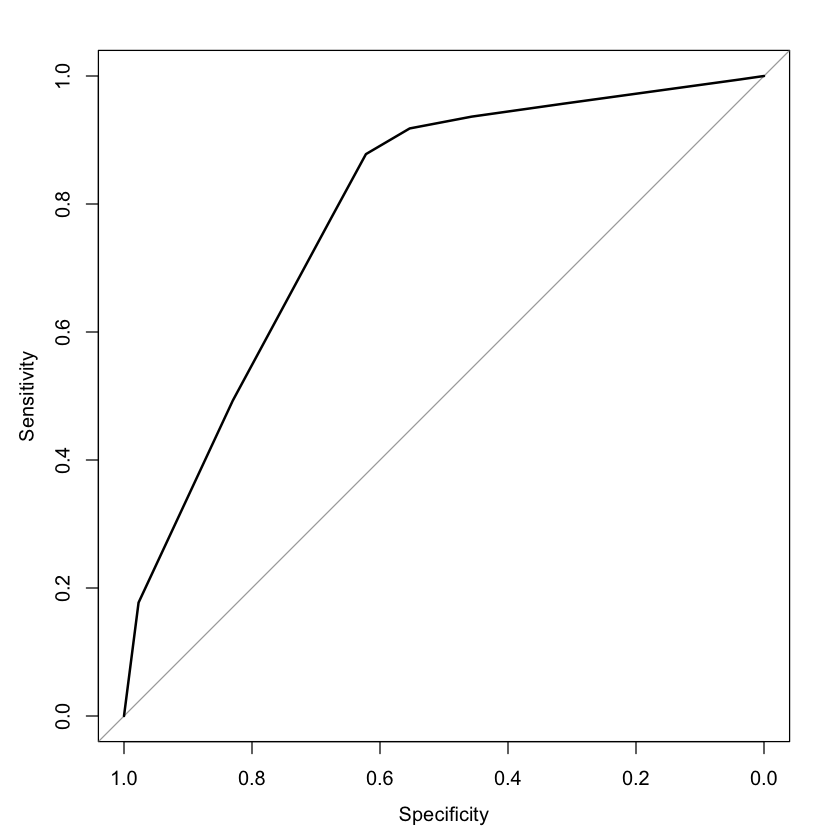

In [62]:
# строим ROC-кривую нашей модели дерева
# для контрольной выборки
roc_hold <- roc(holdout$churn, prob_hold[,2])
roc_hold
plot.roc(roc_hold)

## I.14. Вычисление интервальных оценок AUC для модели

In [63]:
# вычисляем 95%-ный доверительный интервал AUC 
# по асимптотическому методу Делонга (по умолчанию)
# для модели дерева на контрольной выборке
roc_hold <- roc(holdout$churn, prob_hold[,2], ci = TRUE)
roc_hold


Call:
roc.default(response = holdout$churn, predictor = prob_hold[,     2], ci = TRUE)

Data: prob_hold[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.7875
95% CI: 0.7637-0.8112 (DeLong)

In [64]:
# бутстреп использует рандомизацию, поэтому 
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
set.seed(14)
# вычисляем 95%-ный доверительный интервал AUC 
# по бутстреп-методу (по умолчанию 2000 бутстреп-
# выборок) для модели дерева на контрольной выборке
ci.auc(roc_hold, method = "bootstrap")

95% CI: 0.763-0.8111 (2000 stratified bootstrap replicates)

## I.15. Сравнение графиков ROC-кривых для обучающей и контрольной выборок

In [65]:
# вычисляем вероятности классов для обучающей
# выборки и записываем в объект prob_dev
prob_dev <- predict(chd, development, type = "prob")

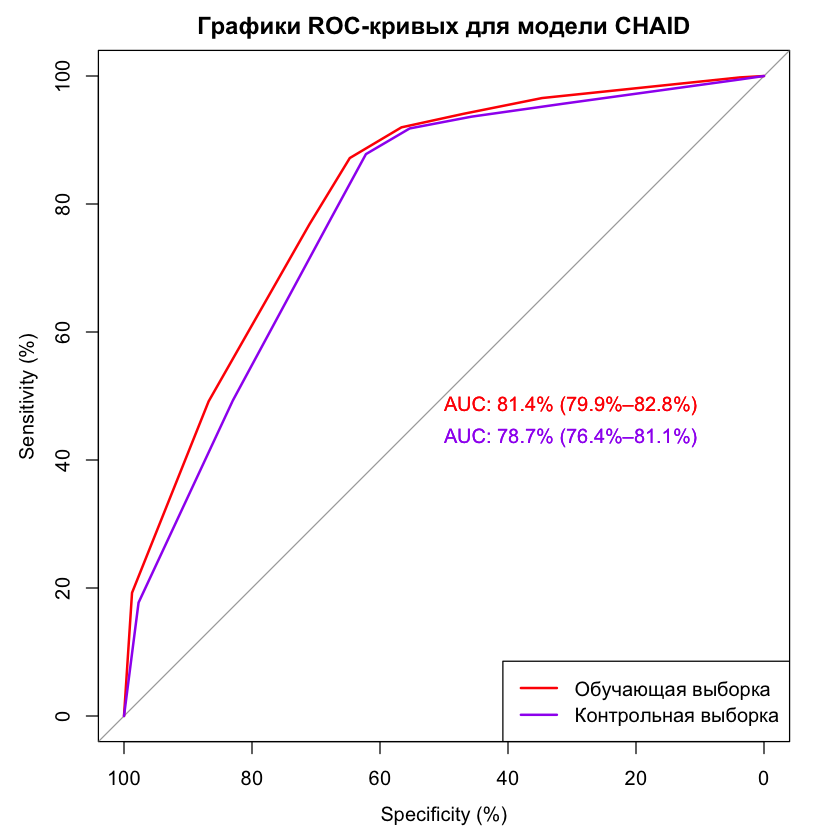

In [66]:
# строим график ROC-кривой для обучающей выборки
roc_dev <-plot.roc(development$churn, prob_dev[, 2], 
                   main = "Графики ROC-кривых для модели CHAID",
                   ci = TRUE, percent = TRUE,
                   print.auc = TRUE, col = "red")

# добавляем в уже существующий график ROC-кривую
# для контрольной выборки
roc_hold <-plot.roc(holdout$churn, prob_hold[, 2], 
                    ci = TRUE, percent = TRUE,
                    print.auc = TRUE, print.auc.x = 50, 
                    print.auc.y = 45, col = "purple", 
                    add = TRUE)

# добавляем легенды
legend("bottomright", 
       legend = c("Обучающая выборка", "Контрольная выборка"), 
       col = c("red", "purple"), lwd = 2)

## I.16. Поиск оптимальных значений гиперпараметров с помощью решетчатого поиска

In [67]:
# загружаем необходимые пакеты
library(caret)
library(e1071)


Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster


Attaching package: ‘e1071’

The following object is masked from ‘package:imputeMissings’:

    impute



In [68]:
# создаем массив признаков и массив меток
features <- setdiff(names(development), "churn")
x <- development[, features]
y <- development$churn

In [69]:
# задаем стратегию проверки
train_control <- trainControl(method = "cv",
                              number = 10, 
                              classProbs = TRUE, 
                              summaryFunction = twoClassSummary)

In [70]:
# пишем функцию 
cusCHAID <- list(label = "custom CHAID",
                 library = "CHAID",
                 loop = NULL,
                 type = c("Classification"),
                 parameters = data.frame(parameter = c('minsplit', 'minbucket', 'minprob', 'maxheight'),
                                         class = rep('numeric', 4),
                                         label = c('Numb obs in response where no further split', 
                                                   "Minimum numb obs in terminal nodes", 
                                                   "Minimum freq of obs in terminal nodes.",
                                                   "Maximum height for the tree")
                 ),
                 grid = function(x, y, len = NULL, search = "grid") {
                   if(search == "grid") {
                     out <- data.frame(minsplit = c(20,30),
                                       minbucket = 7,
                                       minprob = c(0.05,0.01),
                                       maxheight = -1)
                   } else {
                     out <- data.frame(minsplit = c(20,30),
                                       minbucket = 7,
                                       minprob = c(0.05,0.01),
                                       maxheight = -1)
                   }
                   out
                 },
                 fit = function(x, y, wts, param, lev, last, classProbs, ...) {
                   dat <- if(is.data.frame(x)) x else as.data.frame(x)
                   dat$.outcome <- y
                   theDots <- list(...)
                   if(any(names(theDots) == "control")) {
                     theDots$control$minsplit <- param$minsplit
                     theDots$control$minbucket <- param$minbucket
                     theDots$control$minprob <- param$minprob
                     theDots$control$maxheight <- param$maxheight
                     ctl <- theDots$control
                     theDots$control <- NULL
                   } else ctl <- chaid_control(minsplit = param$minsplit,
                                               minbucket = param$minbucket,
                                               minprob = param$minprob,
                                               maxheight = param$maxheight)
                   ## передаем веса
                   if(!is.null(wts)) theDots$weights <- wts
                   modelArgs <- c(
                     list(
                       formula = as.formula(".outcome ~ ."),
                       data = dat,
                       control = ctl),
                     theDots)
                   out <- do.call(CHAID::chaid, modelArgs)
                   out
                 },
                 predict = function(modelFit, newdata, submodels = NULL) {
                   if(!is.data.frame(newdata)) newdata <- as.data.frame(newdata)
                   predict(modelFit, newdata)
                 },
                 prob = function(modelFit, newdata, submodels = NULL) {
                   if(!is.data.frame(newdata)) newdata <- as.data.frame(newdata)
                   predict(modelFit, newdata, type = "prob")
                 },
                 levels = function(x) x$obsLevels,
                 predictors = function(x, surrogate = TRUE, ...) {
                   predictors(terms(x))
                 },
                 tags = c('Tree-Based Model', "Implicit Feature Selection", "Two Class Only", "Accepts Case Weights"),
                 sort = function(x) x[order(-x$minsplit, -x$minbucket, -x$minprob, -x$maxheight),])

In [71]:
# задаем сетку гиперпараметров
search_grid <- expand.grid(
  minsplit = c(300, 200),
  minprob = .01,
  minbucket = c(200, 100, 50),
  maxheight = -1
)
search_grid

minsplit,minprob,minbucket,maxheight
300,0.01,200,-1
200,0.01,200,-1
300,0.01,100,-1
200,0.01,100,-1
300,0.01,50,-1
200,0.01,50,-1


In [72]:
# запускаем решетчатый поиск
chaid_grid <- train(x = x,
                    y = y,
                    method = cusCHAID,
                    trControl = train_control,
                    metric = "ROC",
                    tuneGrid = search_grid)

In [73]:
# выводим результаты решетчатого поиска
print(chaid_grid)

custom CHAID 

3080 samples
   9 predictor
   2 classes: 'Остается', 'Уходит' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2772, 2771, 2772, 2772, 2772, 2772, ... 
Resampling results across tuning parameters:

  minsplit  minbucket  ROC        Sens       Spec     
  200        50        0.8418157  0.8213103  0.7339131
  200       100        0.8418157  0.8213103  0.7339131
  200       200        0.8418157  0.8213103  0.7339131
  300        50        0.8303029  0.7817734  0.7376501
  300       100        0.8303029  0.7817734  0.7376501
  300       200        0.8303029  0.7817734  0.7376501

Tuning parameter 'minprob' was held constant at a value of 0.01

Tuning parameter 'maxheight' was held constant at a value of -1
ROC was used to select the optimal model using the largest value.
The final values used for the model were minsplit = 200, minbucket =
 200, minprob = 0.01 and maxheight = -1.


In [74]:
# вычисляем AUC оптимальной модели
# на контрольной выборке
prob <- predict(chaid_grid, holdout, type = "prob")
roc(holdout$churn, prob[, 2], ci = TRUE)


Call:
roc.default(response = holdout$churn, predictor = prob[, 2],     ci = TRUE)

Data: prob[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.8342
95% CI: 0.8126-0.8558 (DeLong)

# Этап II. Построение модели дерева CHAID на всей исторической выборке и применение к новым данным

## II.1. Загрузка исторических данных

In [75]:
# загружаем все исторические данные
fulldata <- read.csv2("Churn_Verizon.csv", sep = ";", na.strings = "", fileEncoding = "cp1251")

## II.2. Предварительная подготовка данных

In [76]:
# пишем функцию предобработки
preprocess <- function(data, process_target = TRUE) {    
    data <- unique(data)
    data$gender <- as.character(data$gender)
    data$gender <- gsub("\\&\\*", "", data$gender)
    data$gender <- as.factor(data$gender)
    data$marital <- as.character(data$marital)
    data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")
    data$marital <- as.factor(data$marital)
    data$pay <- car::recode(data$pay, "'CD' = 'CC'")
    data$income[is.na(data$income)] <- mean(data$income, na.rm = TRUE)
    values <- imputeMissings::compute(data)
    data <- imputeMissings::impute(data, object = values)
    data$longdist <- ordered(data$longdist, 
                             levels = c("<2", "2-8", "9-14", "15-20", "21+"))
    data$local <- ordered(data$local, 
                          levels = c("<8", "8-20", "21-35", "36-55", "56+"))
    data$agecat <- ordered(data$agecat, 
                           levels = c("<31", "31-45", "46-58", "59-70", "71+"))
    data$income <-cut(x = data$income, 
                      breaks = c(-Inf, 11000, 21000, 31000, 41000,
                                 50000, 59000, 69000, 80000,
                                 90000, +Inf), 
                      include.lowest = TRUE, 
                      ordered_result = TRUE)
    if (process_target) {
    data$churn <- as.factor(data$churn)
    }
    return(data)
}

In [77]:
# применяем функцию предобработки ко всем историческим данным
fulldata <- preprocess(fulldata, process_target = TRUE)

In [78]:
# убеждаемся, что переменные приведены к нужным типам,
# пропуски и редкие категории отсутствуют
print(str(fulldata))
print(sapply(fulldata, function(x) sum(is.na(x))))
print(lapply(fulldata[sapply(fulldata, is.factor)], 
             function(x) sort(table(x, useNA = "ifany"), decreasing = TRUE)))

'data.frame':	4424 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 4 1 1 1 4 4 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 3 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 2 1 1 1 2 1 2 1 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 2 3 1 2 2 1 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 2 1 1 2 2 2 2 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 1 2 2 2 1 1 2 1 ...
 $ income  : Ord.factor w/ 10 levels "[-Inf,1.1e+04]"<..: 8 4 6 6 2 6 6 6 10 4 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 2 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 2 2 ...
NULL
longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0 


## II.3. Обучение модели дерева CHAID на всех исторических данных

In [79]:
# строим модель дерева CHAID с оптимальными значениями гиперпараметров,
# найденными по итогам решетчатого поиска, на всех исторических данных
full_params <- chaid_control(minprob = 0.01, minsplit = 200, minbucket = 200)
full_chd  <- chaid(churn ~ ., control = params, fulldata)

## II.4. Загрузка новых данных

In [80]:
# загружаем новые данные
newdata <- read.csv2("Churn_Verizon_new.csv", sep = ";", fileEncoding = "cp1251", na.strings = "")

## II.5. Предварительная подготовка новых данных

In [81]:
# применяем функцию предобработки к новым данным
newdata <- preprocess(newdata, process_target = FALSE)

In [82]:
# убеждаемся, что переменные приведены к нужным типам,
# пропуски и новые категории отсутствуют
print(str(newdata))
print(sapply(newdata, function(x) sum(is.na(x))))
print(lapply(newdata[sapply(newdata, is.factor)], 
             function(x) sort(table(x, useNA = "ifany"), decreasing = TRUE)))

'data.frame':	64 obs. of  9 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 1 1 1 1 1 1 1 1 4 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 1 1 1 1 1 4 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 1 2 1 1 1 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 2 3 1 1 2 1 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 2 2 1 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 1 2 2 2 1 2 2 1 ...
 $ income  : Ord.factor w/ 10 levels "[-Inf,1.1e+04]"<..: 6 5 2 10 5 7 10 9 5 1 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 1 1 1 1 1 1 1 1 ...
NULL
longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat 
       0 
$longdist
x
15-20    <2   2-8  9-14   21+ 
   25    12    11    11     5 

$local
x
 

## II.6. Применение модели дерева CHAID, построенной на всех исторических данных, к новым данным

In [83]:
# вычисляем вероятности классов для новых данных
newdata_prob <- predict(full_chd, newdata, type = "prob")